Credit card fraud costs about 1% of their revenue to the banks, an amount which customers (us) eventually pay. Let's find those anomalies which might reveal a fraud. Download the popular credit card dataset from Kaggle.

1. [10 pts] Explore the dataset, list the number of rows and columns, check sanity, and
examine the features (e.g. with histograms or plots)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Locate and load the data file

df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Dataset characteristics")
df.info()

Dataset characteristics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

In [5]:
# Checking for duplicates - adapted from Guven, 2024.
df["is_duplicate"]= df.duplicated()
print(f"#duplicated= {len(df[df['is_duplicate']==True])}")

# Drop the duplicate rows using index - best way to drop in pandas
index_to_drop = df[df['is_duplicate']==True].index
df.drop(index_to_drop, inplace=True)

print('--------')
print(f"Duplicated cases:")
# Remove the duplicate marker column
df.drop(columns='is_duplicate', inplace=True)
print(f'#total unique cases= {len(df)}')

# Check missing values in each column
print('--------')
print(f"Number of missing values in columns:")
p0 = df.isnull().sum()
print(p0)

#duplicated= 1081
--------
Duplicated cases:
#total unique cases= 283726
--------
Number of missing values in columns:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Insights:

*   Features V1 to V28 are principal components resulting from a PCA transformation. Their means are very close to 0, as expected after centering the data in PCA.
*   Time and Amount have different scales.

*   Class is the target variable, with a mean close to 0.0017, indicating a very small proportion of fraudulent transactions compared to legitimate ones (about 0.17%).

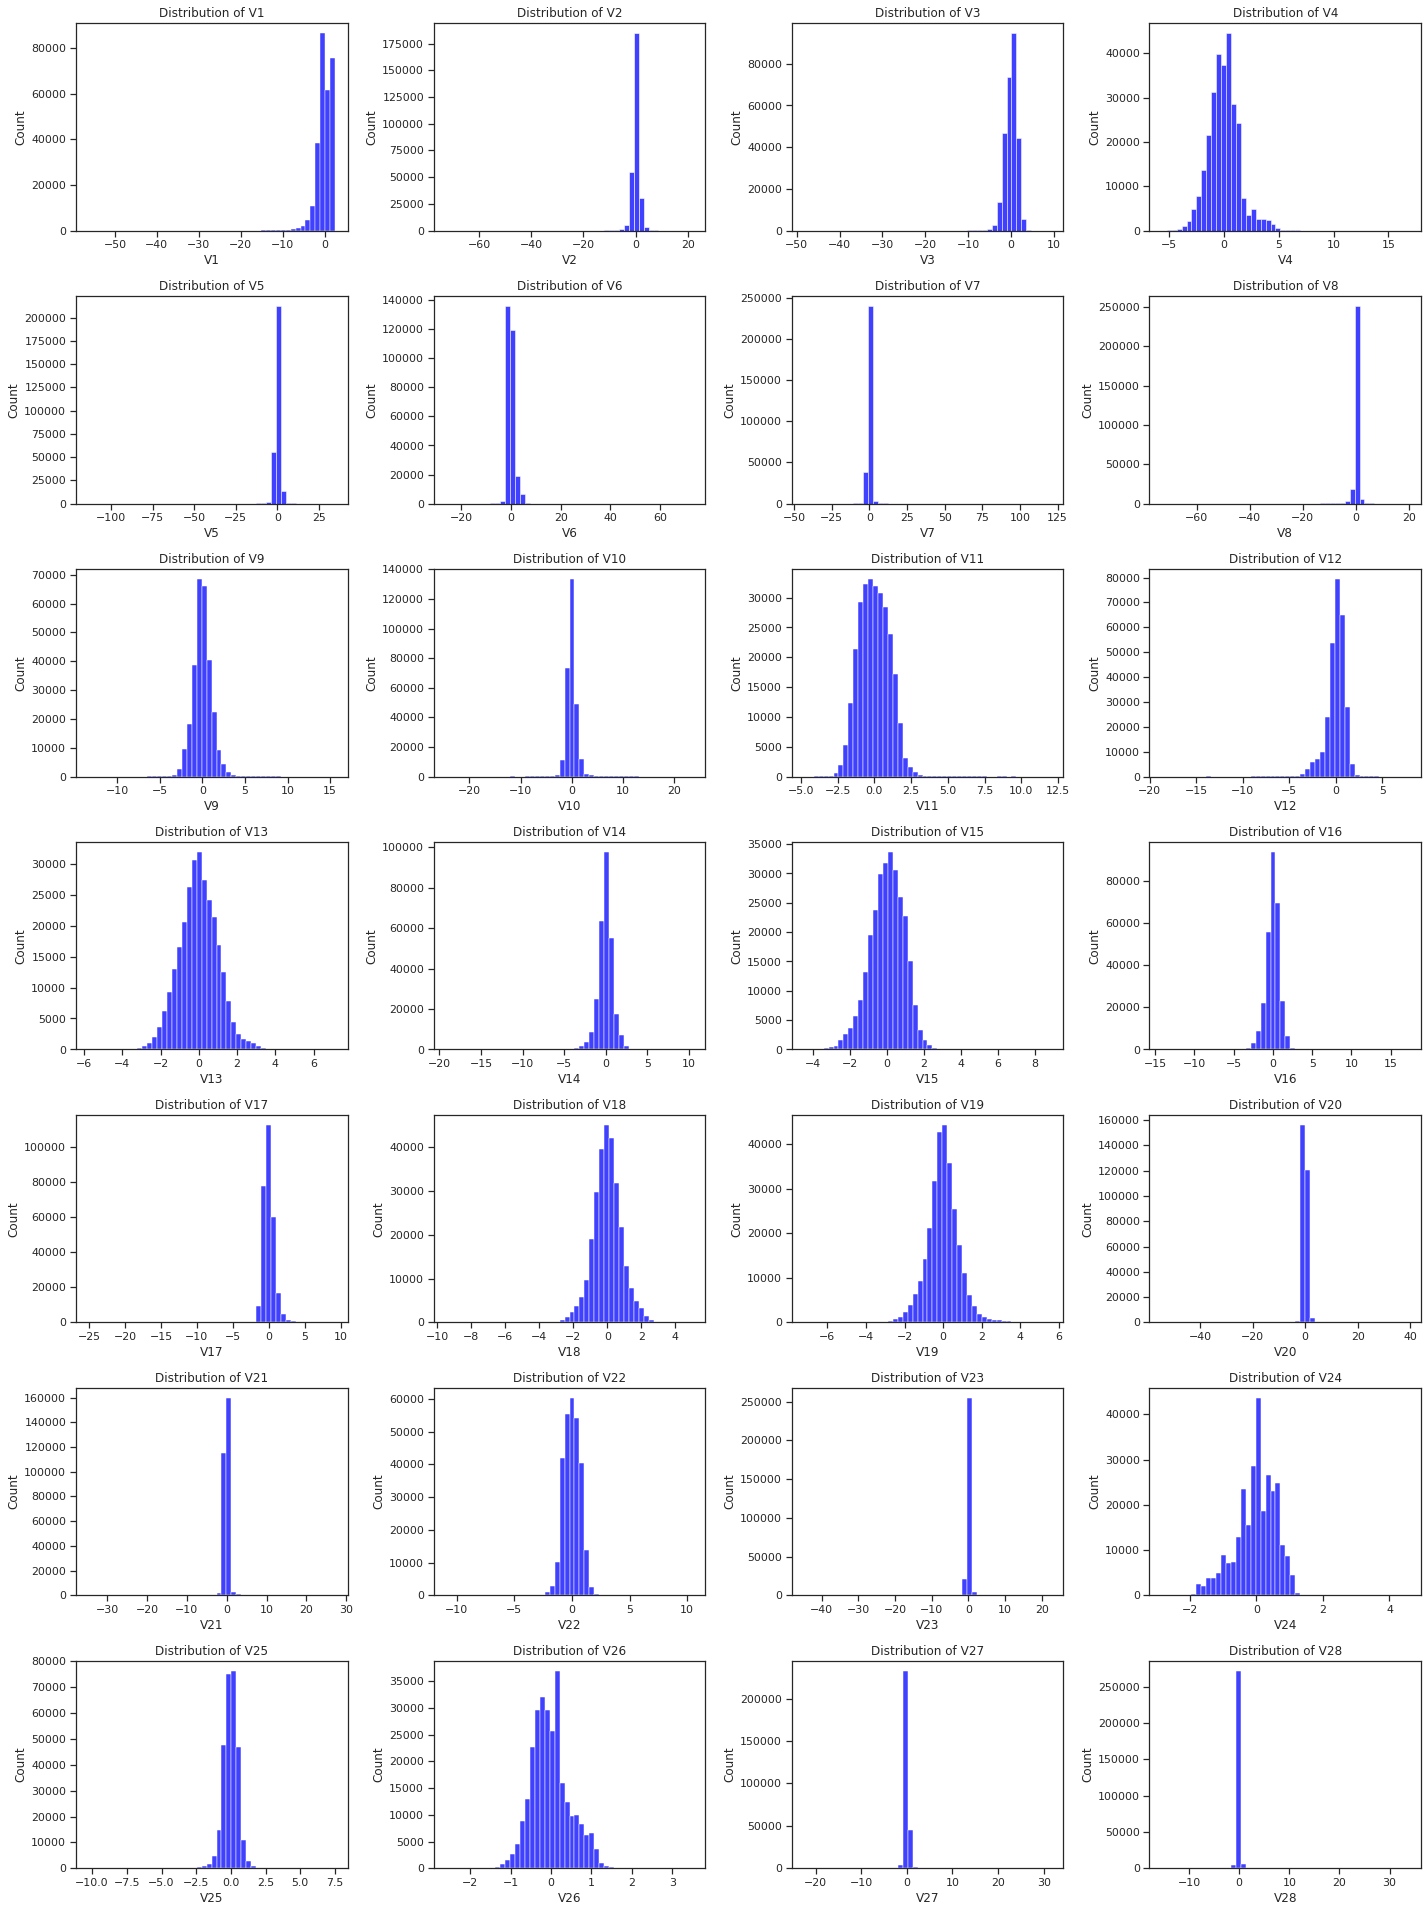

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 30))

# Plot histograms for all features except 'Time' and 'Amount' which were plotted separately
features = df.columns.drop(['Time', 'Amount', 'Class'])
n_features = len(features)

for i, feature in enumerate(features):
    plt.subplot((n_features // 4) + 1, 4, i + 1)
    sns.histplot(df[feature], bins=50, kde=False, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


2. [10 pts] Check the class balance, choose an evaluation metric, and justify the choice.

In [8]:
# Checking the balance of the target variable
target_balance = df['Class'].value_counts(normalize=True)  # Get the proportion of each class

print("Category balance")
target_balance

Category balance


Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

### Metric Chosen

The F1-score is ideal for fraud detection as it balances precision and recall, ensuring the model effectively identifies fraudulent transactions without bias towards the majority class in imbalanced datasets.

3. [10 pts] Check if you need normalization or standardization, and justify. Complete pre-processing.

***Ans.***

 The 'Time' and 'Amount' features might not be standardized, and could benefit from standardization or normalization, especially since they are on a different scale than the PCA features. Checking distributions:

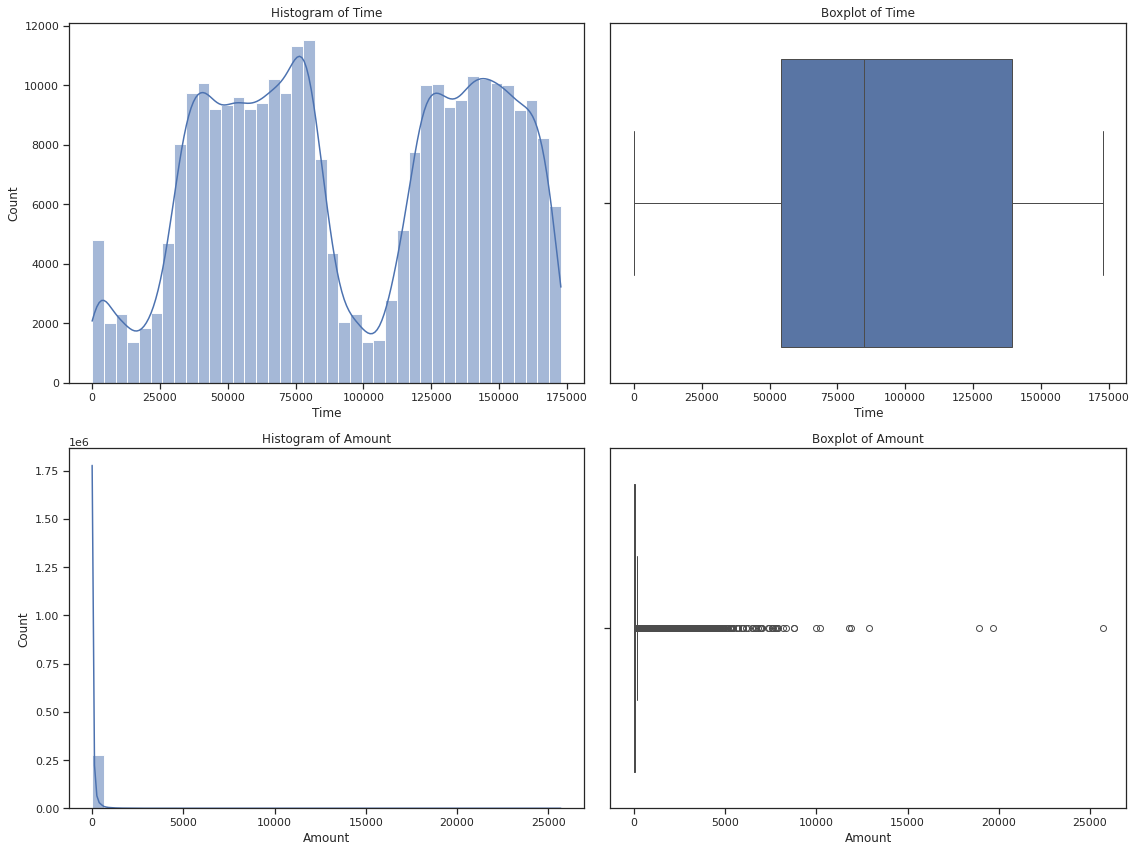

In [9]:
# Checking distributions of 'Time' and 'Amount' using histograms and boxplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Histogram for 'Time'
sns.histplot(df['Time'], bins=40, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Histogram of Time')

# Boxplot for 'Time'
sns.boxplot(x=df['Time'], ax=ax[0, 1])
ax[0, 1].set_title('Boxplot of Time')

# Histogram for 'Amount'
sns.histplot(df['Amount'], bins=40, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Histogram of Amount')

# Boxplot for 'Amount'
sns.boxplot(x=df['Amount'], ax=ax[1, 1])
ax[1, 1].set_title('Boxplot of Amount')

plt.tight_layout()
plt.show()

### Analysis:
- **Time**: The histogram indicates a bimodal distribution, suggesting two peaks in transaction activities. The boxplot shows a broad range without severe outliers. Apply standardization to manage the range and improve alignment with other features.

- **Amount**: This feature is heavily right-skewed with most transactions being low in value but includes significant outliers, as seen in the boxplot.Use normalization (Min-Max scaling) to handle the right skew and outliers, ensuring all values are on a consistent scale without outliers skewing the overall data distribution.


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
scaler_standard = StandardScaler()
scaler_min_max = MinMaxScaler()

# Copy the dataset to apply transformations
processed_data = df.copy()

# Apply standardization to 'Time'
processed_data['Time'] = scaler_standard.fit_transform(processed_data[['Time']])

# Apply Min-Max normalization to 'Amount'
processed_data['Amount'] = scaler_min_max.fit_transform(processed_data[['Amount']])

# Display summary statistics of transformed 'Time' and 'Amount' to check the effects of scaling
transformed_summary = processed_data[['Time', 'Amount']].describe()
transformed_summary

,Time,Amount
count,2.837260e+05,283726.000000
mean,1.218105e-16,0.003444
std,1.000002e+00,0.009747
min,-1.996823e+00,0.000000
25%,-8.552128e-01,0.000218
50%,-2.131081e-01,0.000856
75%,9.369423e-01,0.003017
max,1.642362e+00,1.000000


4. [10 pts] Split the dataset 50-50 for training and testing. Then, without any tree pruning or
regularization, run classifiers of the following types:
• SVC
• DecisionTreeClassifier
• MLPClassifier
• RandomForest
Report each one’s classification performance

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Splitting the dataset into training and testing sets (50-50 split)
X = processed_data.drop('Class', axis=1)
y = processed_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the classifiers
svc = SVC()
decision_tree = DecisionTreeClassifier()
mlp = MLPClassifier()
random_forest = RandomForestClassifier()

# List of classifiers
classifiers = {
    "Support Vector Classifier": svc,
    "Decision Tree": decision_tree,
    "MLP Classifier": mlp,
    "Random Forest": random_forest
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Training the classifier
    clf.fit(X_train, y_train)

    # Making predictions
    y_pred = clf.predict(X_test)

    # Reporting classification performance
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")


Classification Report for Support Vector Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141631
           1       0.94      0.57      0.71       232

    accuracy                           1.00    141863
   macro avg       0.97      0.79      0.86    141863
weighted avg       1.00      1.00      1.00    141863



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141631
           1       0.75      0.71      0.73       232

    accuracy                           1.00    141863
   macro avg       0.87      0.86      0.86    141863
weighted avg       1.00      1.00      1.00    141863



Classification Report for MLP Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141631
           1       0.92      0.75      0.82       232

    accuracy                           

5. [10 pts] Now use tree pruning and/or regularization to run classifiers of the following types:
• SVC
• DecisionTreeClassifier
• MLPClassifier
(Hint: you might use GridSearchCV to optimize the regularization parameters, or simply run
a few pilot tests). Report each one’s classification performance. Make sure to use the same
subsets as above to train and test

In [12]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grids for each classifier
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'early_stopping': [True],  # Enable early stopping
    'validation_fraction': [0.1],  # Fraction of training data as validation set
    'n_iter_no_change': [10]  # Number of iterations with no improvement to wait before stopping
}

# Setting up GridSearchCV for each classifier with specified parameter grids
grid_svc = GridSearchCV(SVC(), param_grid_svc, refit=True, verbose=3, n_jobs=-1)
grid_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, refit=True, verbose=3, n_jobs=-1)
grid_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, refit=True, verbose=3, n_jobs=-1)

# List of classifier grids
grids = {
    "Support Vector Classifier": grid_svc,
    "Decision Tree": grid_decision_tree,
    "MLP Classifier": grid_mlp
}

# Train and evaluate each classifier grid
for name, grid in grids.items():
    # Fitting the grid search
    grid.fit(X_train, y_train)

    # Best estimator found
    print(f"Best parameters for {name}: {grid.best_params_}")

    # Making predictions
    y_pred = grid.predict(X_test)

    # Reporting classification performance
    print(f"Classification Report for {name} (with optimization):\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Support Vector Classifier: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report for Support Vector Classifier (with optimization):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141631
           1       0.84      0.75      0.79       232

    accuracy                           1.00    141863
   macro avg       0.92      0.87      0.89    141863
weighted avg       1.00      1.00      1.00    141863



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20}
Classification Report for Decision Tree (with optimization):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141631
           1       0.86      0.71      0.78       232

    accuracy                           1.00    141863
   macro avg       0.93      0.86      0.89    141863
weig

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for MLP Classifier: {'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'n_iter_no_change': 10, 'validation_fraction': 0.1}
Classification Report for MLP Classifier (with optimization):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141631
           1       0.91      0.73      0.81       232

    accuracy                           1.00    141863
   macro avg       0.96      0.86      0.91    141863
weighted avg       1.00      1.00      1.00    141863





6. [30 pts] Script a PyTorch neural network with a hidden layer. (You could also experiment
with 2 hidden layers, with sizes between 20 and 40). Report its classification performance,
using the same 50-50 subsets. (Expect a similar performance to the neural network in Q5.)

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Convert DataFrame to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.int64))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.int64))

# Creating datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Neural network definition with one or two hidden layers
class NeuralNet(nn.Module):
    def __init__(self, num_features, num_hidden1=20, num_hidden2=40, two_hidden_layers=False):
        super(NeuralNet, self).__init__()
        if two_hidden_layers:
            self.layer1 = nn.Linear(num_features, num_hidden1)
            self.layer2 = nn.Linear(num_hidden1, num_hidden2)
            self.out = nn.Linear(num_hidden2, 2)  # Binary classification
        else:
            self.layer1 = nn.Linear(num_features, num_hidden1)
            self.out = nn.Linear(num_hidden1, 2)  # Binary classification

    def forward(self, x):
        if hasattr(self, 'layer2'):
            x = torch.relu(self.layer1(x))
            x = torch.relu(self.layer2(x))
        else:
            x = torch.relu(self.layer1(x))
        return self.out(x)

# Number of features from the dataset
num_features = X_train.shape[1]

# Initialize the model
model = NeuralNet(num_features, two_hidden_layers=True)  # Set to False for one hidden layer

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train_model(num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Number of epochs
num_epochs = 50
train_model(num_epochs)

# Evaluating the model
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

# Classification report
print(classification_report(y_true, y_pred))

Epoch [1/50], Loss: 0.0001
Epoch [2/50], Loss: 0.0001
Epoch [3/50], Loss: 0.0000
Epoch [4/50], Loss: 0.0002
Epoch [5/50], Loss: 0.0001
Epoch [6/50], Loss: 0.0000
Epoch [7/50], Loss: 0.0001
Epoch [8/50], Loss: 0.0000
Epoch [9/50], Loss: 0.0001
Epoch [10/50], Loss: 0.0019
Epoch [11/50], Loss: 0.0000
Epoch [12/50], Loss: 0.0000
Epoch [13/50], Loss: 0.0000
Epoch [14/50], Loss: 0.0050
Epoch [15/50], Loss: 0.0006
Epoch [16/50], Loss: 0.0001
Epoch [17/50], Loss: 0.0015
Epoch [18/50], Loss: 0.0000
Epoch [19/50], Loss: 0.0008
Epoch [20/50], Loss: 0.0000
Epoch [21/50], Loss: 0.0000
Epoch [22/50], Loss: 0.0000
Epoch [23/50], Loss: 0.0000
Epoch [24/50], Loss: 0.0000
Epoch [25/50], Loss: 0.0000
Epoch [26/50], Loss: 0.0000
Epoch [27/50], Loss: 0.0190
Epoch [28/50], Loss: 0.0000
Epoch [29/50], Loss: 0.0000
Epoch [30/50], Loss: 0.0000
Epoch [31/50], Loss: 0.0004
Epoch [32/50], Loss: 0.0000
Epoch [33/50], Loss: 0.0002
Epoch [34/50], Loss: 0.0000
Epoch [35/50], Loss: 0.0002
Epoch [36/50], Loss: 0.0000
E

7. [10 pts] Add dropout to the PyTorch neural network and repeat the previous step. Note that a robust model, even with a performance comparable to Q5. or Q6.’s neural networks, is always preferred. Why?

In [14]:
# Neural network definition with dropout
class NeuralNetWithDropout(nn.Module):
    def __init__(self, num_features, num_hidden1=20, num_hidden2=40, two_hidden_layers=False):
        super(NeuralNetWithDropout, self).__init__()
        dropout_rate = 0.5  # Dropout rate of 50%
        if two_hidden_layers:
            self.layer1 = nn.Linear(num_features, num_hidden1)
            self.relu1 = nn.ReLU()
            self.dropout1 = nn.Dropout(dropout_rate)
            self.layer2 = nn.Linear(num_hidden1, num_hidden2)
            self.relu2 = nn.ReLU()
            self.dropout2 = nn.Dropout(dropout_rate)
            self.out = nn.Linear(num_hidden2, 2)
        else:
            self.layer1 = nn.Linear(num_features, num_hidden1)
            self.relu1 = nn.ReLU()
            self.dropout1 = nn.Dropout(dropout_rate)
            self.out = nn.Linear(num_hidden1, 2)

    def forward(self, x):
        if hasattr(self, 'layer2'):
            x = self.dropout1(self.relu1(self.layer1(x)))
            x = self.dropout2(self.relu2(self.layer2(x)))
        else:
            x = self.dropout1(self.relu1(self.layer1(x)))
        return self.out(x)

# Initialize the model with dropout
model = NeuralNetWithDropout(num_features, two_hidden_layers=True)  # Set to False for one hidden layer

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model with dropout
def train_model(num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Number of epochs
num_epochs = 50
train_model(num_epochs)

# Evaluating the model with dropout
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

# Classification report
print(classification_report(y_true, y_pred))

Epoch [1/50], Loss: 0.0012
Epoch [2/50], Loss: 0.0001
Epoch [3/50], Loss: 0.0012
Epoch [4/50], Loss: 0.0001
Epoch [5/50], Loss: 0.0000
Epoch [6/50], Loss: 0.0001
Epoch [7/50], Loss: 0.0017
Epoch [8/50], Loss: 0.0020
Epoch [9/50], Loss: 0.0002
Epoch [10/50], Loss: 0.0001
Epoch [11/50], Loss: 0.0002
Epoch [12/50], Loss: 0.0002
Epoch [13/50], Loss: 0.0001
Epoch [14/50], Loss: 0.0001
Epoch [15/50], Loss: 0.0087
Epoch [16/50], Loss: 0.0001
Epoch [17/50], Loss: 0.0038
Epoch [18/50], Loss: 0.0000
Epoch [19/50], Loss: 0.0028
Epoch [20/50], Loss: 0.0001
Epoch [21/50], Loss: 0.0000
Epoch [22/50], Loss: 0.0009
Epoch [23/50], Loss: 0.0003
Epoch [24/50], Loss: 0.0008
Epoch [25/50], Loss: 0.0005
Epoch [26/50], Loss: 0.0000
Epoch [27/50], Loss: 0.0004
Epoch [28/50], Loss: 0.0001
Epoch [29/50], Loss: 0.0002
Epoch [30/50], Loss: 0.0001
Epoch [31/50], Loss: 0.0000
Epoch [32/50], Loss: 0.0001
Epoch [33/50], Loss: 0.0001
Epoch [34/50], Loss: 0.0000
Epoch [35/50], Loss: 0.0001
Epoch [36/50], Loss: 0.0001
E

A robust model is preferred because it excels in generalization, reduces overfitting, and offers performance stability. By employing techniques like dropout, the model avoids depending too much on specific neurons, thus enhancing its ability to perform consistently well on both seen and unseen data. This stability is crucial in applications such as fraud detection, where the model must adapt to evolving patterns of fraudulent activity without being misled by noise or anomalies in the training data.

8. [10 pts] Train a Random Forest classifier with 10-fold CV; revisit the two PyTorch neural network from Q6. and Q7. And train them with 10-fold CV as well. Comment on the results.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Perform 10-fold cross-validation
rf_cv_scores = cross_val_score(random_forest, X, y, cv=10)

# Print the average accuracy and standard deviation
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.2f} +/- {rf_cv_scores.std():.2f}")


Random Forest CV Accuracy: 0.92 +/- 0.25


In [16]:
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Function to train and evaluate a PyTorch model
def train_evaluate_pytorch_model(model, train_loader, test_loader):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Initialize 10-fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
results = []

# Assuming X and y are the features and labels as Pandas DataFrame and Series
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train_fold.values.astype(np.float32))
    y_train_tensor = torch.tensor(y_train_fold.values.astype(np.int64))
    X_test_tensor = torch.tensor(X_test_fold.values.astype(np.float32))
    y_test_tensor = torch.tensor(y_test_fold.values.astype(np.int64))

    # Create data loaders
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)

    # Initialize the PyTorch model (either with or without dropout)
    model = NeuralNetWithDropout(X_train_fold.shape[1], two_hidden_layers=True)  # Adjust parameters as necessary

    # Train and evaluate the model
    fold_accuracy = train_evaluate_pytorch_model(model, train_loader, test_loader)
    results.append(fold_accuracy)

# Print average results from the folds
print(f"Average 10-fold CV Accuracy: {np.mean(results):.2f} +/- {np.std(results):.2f}")

Average 10-fold CV Accuracy: 1.00 +/- 0.00
